In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data = pd.read_csv('Dataset1.csv')

In [3]:
data.head()

,isIPInURL,isLongURL,isTinyURL,isAlphaNumericURL,isRedirectingURL,isHypenURL,isMultiDomainURL,isFaviconDomainUnidentical,isIllegalHttpsURL,isImgFromDifferentDomain,isAnchorFromDifferentDomain,isScLnkFromDifferentDomain,isFormActionInvalid,isMailToAvailable,isStatusBarTampered,isIframePresent,Target
0,-1,1,1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,0,-1,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,1,-1,1,0,-1,-1,-1,1,1,-1
3,1,0,1,1,1,-1,-1,1,-1,-1,0,0,-1,1,1,1,-1
4,1,0,-1,1,1,-1,1,1,1,1,0,0,-1,1,-1,1,1


In [4]:
x = data.iloc[:, :-1].values

In [5]:
x

array([[-1,  1,  1, ..., -1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ..., -1,  1,  1],
       ...,
       [ 1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ...,  1, -1,  1],
       [-1, -1,  1, ...,  1,  1,  1]], dtype=int64)

In [6]:
y = data['Target']

In [7]:
y

0       -1
1       -1
2       -1
3       -1
4        1
        ..
11050    1
11051   -1
11052   -1
11053   -1
11054   -1
Name: Target, Length: 11055, dtype: int64

In [8]:
freq_data = data['Target'].value_counts()

In [9]:
print(freq_data)

 1    6157
-1    4898
Name: Target, dtype: int64


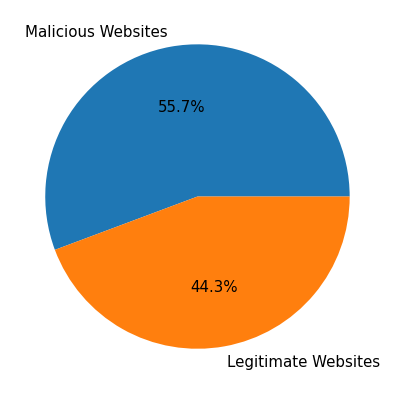

In [10]:
site = ['Malicious Websites','Legitimate Websites']
fig = plt.figure(figsize =(7, 7))
plt.pie(freq_data,autopct='%1.1f%%',labels = site, textprops={'fontsize': 15})
 
# show plot
plt.show()

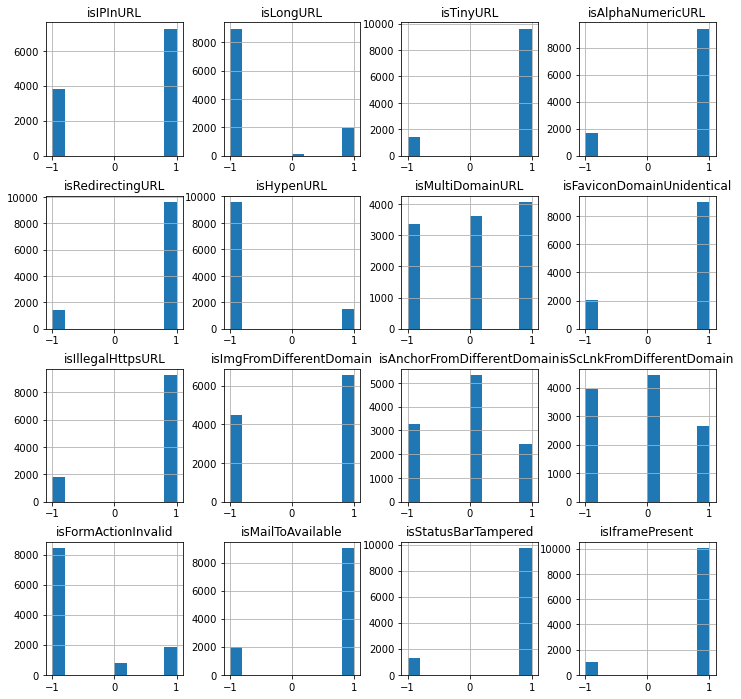

In [11]:
data0 = data.drop(['Target'], axis = 1).copy()
data0.hist(bins = 10,figsize = (12,12))
plt.show()

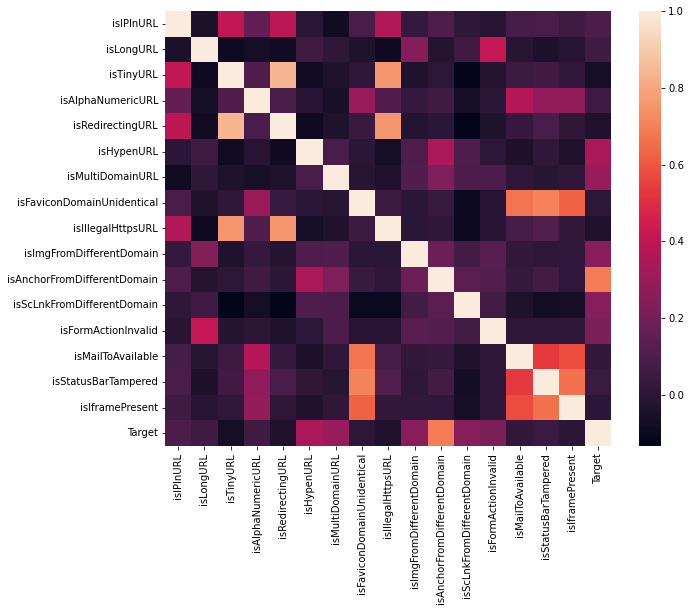

In [12]:
#Correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(data.corr())
plt.show()

[[1223  205]
 [ 186 1703]]
              precision    recall  f1-score   support

          -1       0.87      0.86      0.86      1428
           1       0.89      0.90      0.90      1889

    accuracy                           0.88      3317
   macro avg       0.88      0.88      0.88      3317
weighted avg       0.88      0.88      0.88      3317



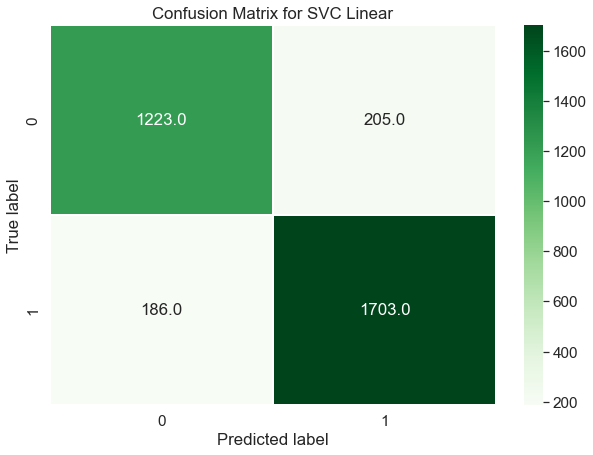

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.3, random_state=42)  
trainedsvm = svm.LinearSVC(random_state = 42).fit(X_train, Y_train)
predictionsvm = trainedsvm.predict(X_test)
#trainedsvm = svm.SVC(kernel='rbf',C=2).fit(X_train, Y_train)
#predictionsvm = trainedsvm.predict(X_test)
cf = confusion_matrix(Y_test,predictionsvm)
print(cf)
print(classification_report(Y_test,predictionsvm))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cf, annot=True, fmt=".1f",
            cmap=plt.cm.Greens, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVC Linear')
plt.show()

[[1222  206]
 [ 109 1780]]
              precision    recall  f1-score   support

          -1       0.92      0.86      0.89      1428
           1       0.90      0.94      0.92      1889

    accuracy                           0.91      3317
   macro avg       0.91      0.90      0.90      3317
weighted avg       0.91      0.91      0.90      3317



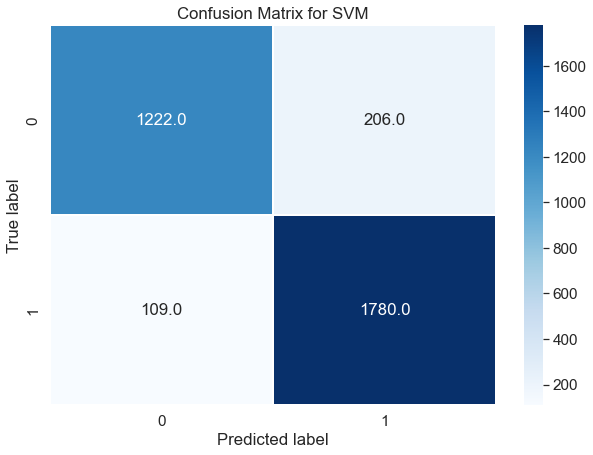

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.3, random_state=42)  
#trainedsvm = svm.LinearSVC().fit(X_train, Y_train)
#predictionsvm = trainedsvm.predict(X_test)
trainedsvm = svm.SVC(kernel='rbf',C=2,random_state = 42).fit(X_train, Y_train)
predictionsvm = trainedsvm.predict(X_test)
cf = confusion_matrix(Y_test,predictionsvm)
print(cf)
print(classification_report(Y_test,predictionsvm))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cf, annot=True, fmt=".1f",
            cmap=plt.cm.Blues, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM')
plt.show()

[[1261  167]
 [ 145 1744]]
              precision    recall  f1-score   support

          -1       0.90      0.88      0.89      1428
           1       0.91      0.92      0.92      1889

    accuracy                           0.91      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.91      0.91      0.91      3317



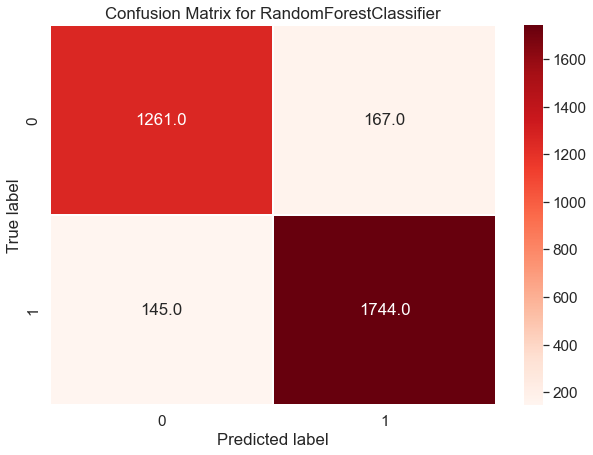

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.3, random_state=42)  
#trainedsvm = svm.LinearSVC().fit(X_train, Y_train)
#predictionsvm = trainedsvm.predict(X_test)
trainedsvm = RandomForestClassifier(n_estimators = 5, criterion = 'entropy',random_state = 42).fit(X_train, Y_train)
predictionsvm = trainedsvm.predict(X_test)
cf = confusion_matrix(Y_test,predictionsvm)
print(cf)
print(classification_report(Y_test,predictionsvm))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cf, annot=True, fmt=".1f",
            cmap=plt.cm.Reds, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[1219  209]
 [ 123 1766]]
              precision    recall  f1-score   support

          -1       0.91      0.85      0.88      1428
           1       0.89      0.93      0.91      1889

    accuracy                           0.90      3317
   macro avg       0.90      0.89      0.90      3317
weighted avg       0.90      0.90      0.90      3317



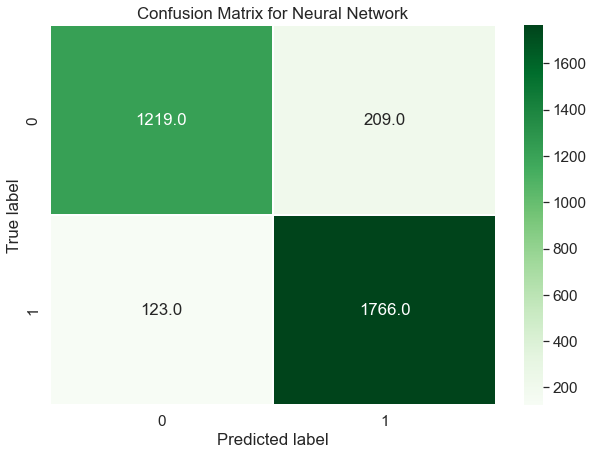

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.3, random_state=42)  
#trainedsvm = svm.LinearSVC().fit(X_train, Y_train)
#predictionsvm = trainedsvm.predict(X_test)
trainedsvm = MLPClassifier(hidden_layer_sizes=(100), activation='logistic',random_state = 42).fit(X_train, Y_train)
predictionsvm = trainedsvm.predict(X_test)
cf = confusion_matrix(Y_test,predictionsvm)
print(cf)
print(classification_report(Y_test,predictionsvm))

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cf, annot=True, fmt=".1f",
            cmap=plt.cm.Greens, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Neural Network')
plt.show()

['isIPInURL' 'isLongURL' 'isTinyURL' 'isAlphaNumericURL'
 'isRedirectingURL' 'isHypenURL' 'isMultiDomainURL'
 'isFaviconDomainUnidentical' 'isIllegalHttpsURL'
 'isImgFromDifferentDomain' 'isAnchorFromDifferentDomain'
 'isScLnkFromDifferentDomain' 'isFormActionInvalid' 'isMailToAvailable'
 'isStatusBarTampered' 'isIframePresent']
[-0.29960005 -0.11463236 -0.07690474 -0.06141935 -0.05645875  0.0119836
  0.0822727   0.09952604  0.12585648  0.14797609  0.22837319  0.24044801
  0.27482654  0.29743643  1.15593414  1.174943  ]
3.2305609915868816


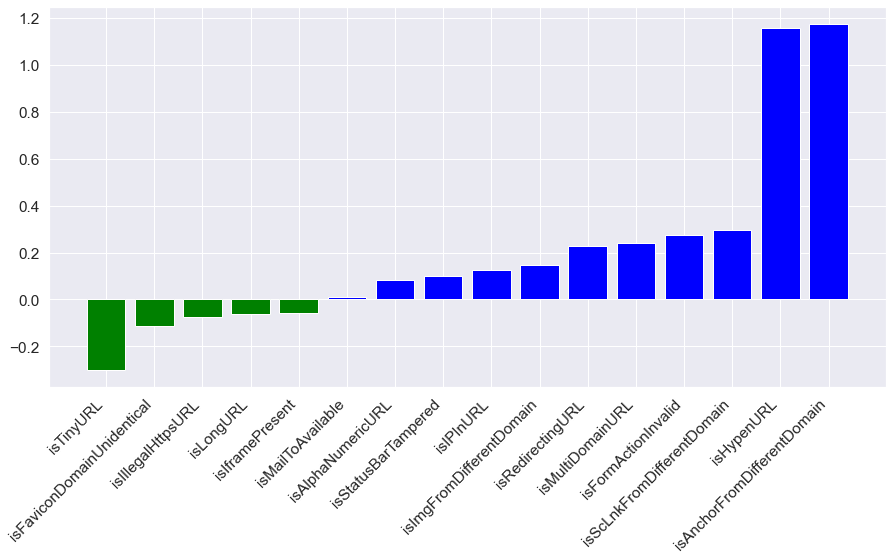

In [24]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=8):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(15, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 print(coef[top_coefficients])   
 print(sum(coef[top_coefficients]))    
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(data.drop(['Target'], axis = 1).columns.values)

trainedsvm = svm.LinearSVC(random_state = 42).fit(x, y)
#trainedsvm = svm.SVC(kernel='rbf',C=2).fit(x, y)
feature_plot(trainedsvm, data.drop(['Target'], axis = 1).columns.values)

['isIPInURL' 'isLongURL' 'isTinyURL' 'isAlphaNumericURL'
 'isRedirectingURL' 'isHypenURL' 'isMultiDomainURL'
 'isFaviconDomainUnidentical' 'isIllegalHttpsURL'
 'isImgFromDifferentDomain' 'isAnchorFromDifferentDomain'
 'isScLnkFromDifferentDomain' 'isFormActionInvalid' 'isMailToAvailable'
 'isStatusBarTampered' 'isIframePresent']
[0.00890677 0.00943355 0.01070181 0.0120068  0.01392377 0.01437275
 0.01504415 0.01573595 0.02243565 0.03051172 0.03172356 0.04058476
 0.06737348 0.07369441 0.0841794  0.54937146]
1.0


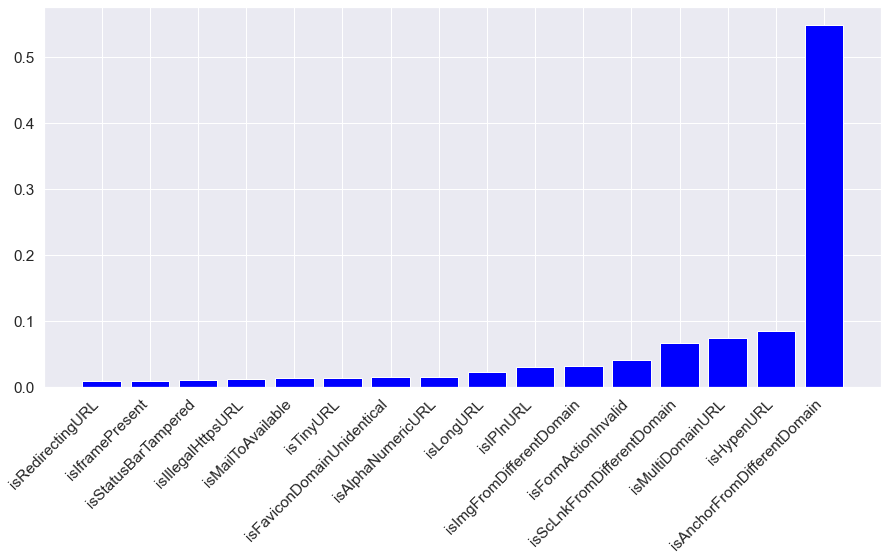

In [22]:
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=8):
 coef = classifier.feature_importances_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(15, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 print(coef[top_coefficients])   
 print(sum(coef[top_coefficients]))   
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()

print(data.drop(['Target'], axis = 1).columns.values)

trainedsvm = RandomForestClassifier(n_estimators = 5, criterion = 'entropy',random_state = 42).fit(x, y)
feature_plot(trainedsvm, data.drop(['Target'], axis = 1).columns.values)